In [21]:
import numpy as np

result = {}

folder = 'inference-times'
detectors = ['frcnn-fpn', 'retinanet']
labels = ['head', 'shoulder', 'body']

LABEL = 'head'
for LABEL in labels:
  result[LABEL] = []
  for detector in detectors:
    path = "%s/%s-%s.txt" % (folder, LABEL, detector)
    with open(path) as f:
      data = [line[:-1] for line in f]
      data = [float(x) for x in data]
      data = np.array(data)
      result[LABEL].append(np.median(data))

print(result)

{'head': [0.159, 0.333], 'body': [0.167, 0.284], 'shoulder': [0.209, 0.273]}


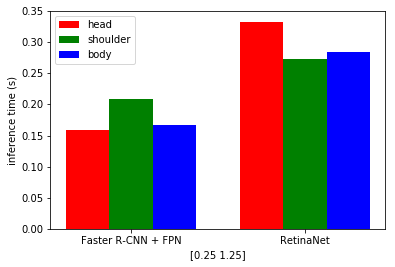

In [33]:
import matplotlib.pyplot as plt

X = np.arange(2)

width = 0.25

fig = plt.figure()
ax = fig.add_subplot(111)

r1 = ax.bar(X - width, result['head'], color='r', width=width)
r2 = ax.bar(X, result['shoulder'], color='g', width=width)
r3 = ax.bar(X + width, result['body'], color='b', width=width)

ax.set_ylabel('inference time (s)')
ax.set_xlabel(X + width)
ax.set_xticks(X)
ax.set_xticklabels(('Faster R-CNN + FPN', 'RetinaNet'))

ax.legend((r1[0], r2[0], r3[0]), ('head', 'shoulder', 'body'))

plt.show()